In [1]:
import pandas as pd

df = pd.read_csv(r'C:\dataset-0510\okDf_share.csv')
testDf = pd.read_csv(r'C:\dataset-0510\test.csv')
#df = pd.read_csv(r'C:\dataset-0510\train5000.csv')
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)   

C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

目前發現 Building_use的11種類別狀況....應ˇ該是建物型態：
依建物型態分為 
1 公寓(5 樓含以下無電梯)。
2 透天厝。
3 店面(店舖)。
4 辦公商業大樓。
5 住宅大樓(11 層含以上有電梯)。 
6 華廈(10 層含以下有電梯)。
7 套房(1 房(1 廳)1 衛)。
8 工廠。
9 廠辦。
10 農舍。
11 倉庫。

In [2]:
import numpy as np
#補完里民收入後，產生一個富裕指數 = 收入*人口密度 (假設有錢人越密集的地方房價應該會更高)
df['rich']=df['village_income_median']*df['town_population_density']
df['latlon2']=round(abs(df['lat']/100000),1)*100000+round(df['lon'],1)
df['parking_up']=df['parking_price']/df['parking_area']
df=df.replace([np.inf,-np.inf],0)
df['parking_up']=df['parking_up'].fillna(0)
df['bd_diff']=df['born_rate']-df['death_rate']
df['md_diff']=df['marriage_rate']-df['divorce_rate']
df['dj_rate']=df['land_area']/df['building_area']
df['floorHigh_rate']=df['txn_floor']/df['total_floor']
df['land_rich']=df['village_income_median']*df['town_population']/df['town_area']
df['high_edu']=df['doc_rate']+df['master_rate']+df['bachelor_rate']
df['low_edu']=df['highschool_rate']+df['jobschool_rate']
df['buy_edu']=df['junior_rate']+df['elementary_rate']

#是否大樓1,2樓 
df['df15f12'] = ((df['building_type'] != 4) & (df['txn_floor'] <= 2)).astype('int')
df['df15f1'] = ((df['building_type'] != 4) & (df['txn_floor'] == 1)).astype('int')
df['df15f2'] = ((df['building_type'] != 4) & (df['txn_floor'] == 2)).astype('int')
#是否4樓  Building_use 1 公寓(5 樓含以下無電梯)。5 住宅大樓(11 層含以上有電梯)。 6 華廈(10 層含以下有電梯)。
df['df04'] = ((df.building_use.isin([1,5,6])) & (df['txn_floor'] == 4)).astype('int')
#是否為頂樓
#df['istop'] = ((df.building_use.isin([1,5,6])) & (df['txn_floor'] == df['total_floor'])).astype('int')
df['istop11'] = ((df['building_type'] == 5) & (df['txn_floor'] == df['total_floor'])).astype('int')
df['istop10'] = ((df['building_type'] == 6) & (df['txn_floor'] == df['total_floor'])).astype('int')

#某用途分類高層（6樓以上）及低層建築（樓以下）各城市（CITY）房價預測 ( 下一次可以做 One Hot)
df['isf5'] = ((df.building_use.isin([5,6])) & (df['txn_floor'] < 6)).astype('int')
df['isf6'] = ((df.building_use.isin([5,6])) & (df['txn_floor'] >= 6)).astype('int')

#是否超過15樓+用途別building_use(產生約20個特徵值 One Hot) 
#df['is15'] = (df['total_floor'] >= 15)
df.loc[(df.total_floor>=15) ,'is15']=1
df['is15'] = df['is15'].fillna(0)

#到底是不是嫌惡設施 (與價格之間是否有明顯加價或減價的關係)
#trainDf=trainDf[trainDf['total_price']<=20000000]
df['NEW_N_50']=df['N_50']-df['XIV_index_50']
df['NEW_N_500']=df['N_500']-df['XIV_index_500']
df['NEW_N_1000']=df['N_1000']-df['XIV_index_1000']


#將無序類別欄位轉換為有意義的有序類別資料 

cityList=df['city'].unique().tolist() 
CTList=df['CT'].unique().tolist() 
CTVList=df['CTV'].unique().tolist() 
latList=df['lat'].unique().tolist() 
lonList=df['lon'].unique().tolist()  
for city in cityList:     
 cityDf=df[df['city']==city]     
 cityMean=cityDf['total_price'].mean()     
 df.loc [df.city==city,'city_new']=str(cityMean)  
for CT in CTList:     
 CTDf=df[df['CT']==CT]     
 CTMean=CTDf['total_price'].mean()     
 df.loc [df.CT==CT,'CT_new']=str(CTMean)      
for CTV in CTVList:     
 CTVDf=df[df['CTV']==CTV]     
 CTVMean=CTVDf['total_price'].mean()     
 df.loc [df.CTV==CTV,'CTV_new']=str(CTVMean)      
for lat in latList:     
 latDf=df[df['lat']==lat]     
 latMean=latDf['total_price'].mean()     
 df.loc [df.lat==lat,'lat_new']=str(latMean)      
for lon in lonList:     
 lonDf=df[df['lon']==lon]     
 lonMean=lonDf['total_price'].mean()     
 df.loc [df.lon==lon,'lon_new']=str(lonMean)
 

#df['city_type_avg_log']=np.log1p(df['city_type_avg'].astype(float))
#df['CT_type_avg_log']=np.log1p(df['CT_type_avg'].astype(float))
#df['CTV_type_avg_log']=np.log1p(df['CTV_type_avg'].astype(float))
#df['latlon_type_avg_log']=np.log1p(df['latlon_type_avg'].astype(float))

In [3]:
#df['city_type_avg_log'].head()

In [3]:
#開始經緯度特徵工程
#計畫如下:
#1.找出每個City的蛋黃中心點,取出City中前75%高價 Total Price的資料，並計算其經緯度的平均值
#2.計算其他點與蛋黃中心的距離，並以此產生新的特徵
def countCityDis(df,inputCity):
    highAvg=df.loc[df.city==inputCity,'total_price'].quantile(0.8) #前80%分位?
    subDf=df[df['city']==inputCity]
    subDf=subDf[subDf['total_price']>=highAvg]
    cityLat=subDf['lat'].mean()
    cityLon=subDf['lon'].mean()
    df.loc[df.city==inputCity,'cityLat']=cityLat
    df.loc[df.city==inputCity,'cityLon']=cityLon
    print(str(inputCity)+" "+str(cityLat)+" "+str(cityLon))
    #得出距離蛋黃區的歐式距離
    df['cityDis']=np.sqrt((df['lat']-df['cityLat'])**2+(df['lon']-df['cityLon'])**2)
    return df
#Town比照辦理
def countCTDis(df,inputCT):
    highAvg=df.loc[df.CT==inputCT,'total_price'].quantile(0.8) #前80%分位?
    subDf=df[df['CT']==inputCT]
    subDf=subDf[subDf['total_price']>=highAvg]
    CTLat=subDf['lat'].mean()
    CTLon=subDf['lon'].mean()
    df.loc[df.CT==inputCT,'CTLat']=CTLat
    df.loc[df.CT==inputCT,'CTLon']=CTLon
    #得出距離蛋黃區的歐式距離
    df['CTDis']=np.sqrt((df['lat']-df['CTLat'])**2+(df['lon']-df['CTLon'])**2)
    return df

In [4]:
#利用CITY與TOWN組出新特徵CT
df['CT']=df['city']*1000+df['town']

#計算每筆資料距離城市蛋黃區距離
cityList=df['city'].unique().tolist()
for city in cityList:
    df=countCityDis(df,city)

#計算每筆資料距離鄉鎮蛋黃區距離
CTList=df['CT'].unique().tolist()
for CT in CTList:
    df=countCTDis(df,CT) 
#產生之新特徵為 df['cityDis'] (與City蛋黃區距離) df['CTDis'] (與Town蛋黃區距離)


210000000 3914287.313432836 117.13049573560804
70000000 3766882.4424163406 119.31377879183053
120000000 3800312.7906976743 118.17651162790756
170000000 3768182.6086956523 118.60404347826099
100000000 3759360.1769911502 119.12974336283195
130000000 3767707.4181516785 119.39508081226808
140000000 3877816.84981685 117.22101648351642
30000000 3770895.0 119.58219999999996
60000000 3804973.821989529 118.01329842931933
50000000 3926632.1070234114 117.26498327759188
90000000 3762287.356321839 118.81862068965529


In [5]:
df['cityDis'].head()

0     287.313437
1     882.442417
2     117.557586
3    1287.313433
4    9712.686567
Name: cityDis, dtype: float64

In [6]:
df['CTDis'].head()

0     666.666667
1     870.279146
2     129.720854
3     600.000000
4    2052.631579
Name: CTDis, dtype: float64

In [7]:
#把total_price放到最後
dfTran=df
dfTran=dfTran.drop(['avg'],axis=1)
dfTran['avg']=df['avg']
df=dfTran

#使用這種方式

oneHotDF2 = df[['building_use' ,'is15']]

oneHotDF2 = pd.get_dummies(data=oneHotDF2,columns=['building_use'])


In [8]:
df.head()

,building_id,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,...,CTV_new,lat_new,lon_new,cityLat,cityLon,cityDis,CTLat,CTLon,CTDis,avg
0,e3mMIMR3JJqCaXz1,8,210000000,18674,4,3,2,6271,2,0.000000,...,323801.88525,4381388.265974065,4160419.7770643462,3.914287e+06,117.130496,287.313437,3.914667e+06,117.080000,666.666667,189459
1,LgwzgklNvy4QCtq5,8,70000000,18800,5,1,2,7885,2,0.000000,...,3762725.5119999996,10661502.82222622,6424849.8935932405,3.766882e+06,119.313779,882.442417,3.766870e+06,119.301675,870.279146,821875
2,ucIR2NLLsC3T650L,8,70000000,19289,4,1,2,6028,2,0.000000,...,11169522.268407404,13925611.64237057,7422302.990774097,3.766882e+06,119.313779,117.557586,3.766870e+06,119.301675,129.720854,1713898
3,jre1pJhcQj91Kdky,8,210000000,20385,24,0,2,18325,0,5.760412,...,9452381.86098395,6671667.374129586,5259384.812999115,3.914287e+06,117.130496,1287.313433,3.912400e+06,117.103357,600.000000,1048070
4,rQpYpY9nRG7X5mmr,1,210000000,20657,2,4,2,6880,2,0.000000,...,1572397.45334,2723631.7578704422,4383900.838729901,3.914287e+06,117.130496,9712.686567,3.921947e+06,117.176579,2052.631579,162691


In [9]:
from sklearn.preprocessing import StandardScaler
#selectedDF=df[['city', 'town', 'village' ,'building_type' ,'building_use' ,'parking_way','land_area','building_area','village_income_median','master_rate','bachelor_rate','jobschool_rate','highschool_rate','junior_rate','elementary_rate','divorce_rate','I_10000','II_10000','III_10000','IV_10000','V_10000','VI_10000','VII_10000','VIII_10000','IX_10000','X_10000','XI_10000','XII_10000','XIII_10000']]
def fieldSelection():
    selectedDF=df[[
                    #city_type_avg','CT_type_avg','CTV_type_avg','latlon_type_avg'
                    'city_new','CT_new','CTV_new','lat_new','lon_new'
                   ,'buy_edu','low_edu','high_edu','land_rich','floorHigh_rate','dj_rate'
                   ,'bd_diff','md_diff','parking_up','town','village','rich','buildAge'
                   ,'I_10','I_50','I_100','I_250','I_500','I_1000','I_5000','I_10000',
               #'I_index_50','I_index_500','I_index_1000','I_index_5000','I_index_10000',
               'II_10','II_50','II_100','II_250','II_500','II_1000','II_5000','II_10000',
               #'II_index_50','II_index_500','II_index_1000','II_index_5000','II_index_10000',
               'III_10','III_50','III_100','III_250','III_500','III_1000','III_5000','III_10000',
               #'III_index_50','III_index_500','III_index_1000','III_index_5000','III_index_10000',
               'IV_10','IV_50','IV_100','IV_250','IV_500','IV_1000','IV_5000','IV_10000',
               #'IV_index_50','IV_index_500','IV_index_1000','IV_index_5000','IV_index_10000',
               'VI_500','VI_1000','VI_5000','VI_10000',
               #'VI_index_50','VI_index_500','VI_index_1000','VI_index_5000','VI_index_10000',
               'VII_10','VII_50','VII_100','VII_250','VII_500','VII_1000','VII_5000','VII_10000',
               #'VII_index_50','VII_index_500','VII_index_1000','VII_index_5000','VII_index_10000',
               'VIII_10','VIII_50','VIII_100','VIII_250','VIII_500','VIII_1000','VIII_5000','VIII_10000',
                #'VIII_index_50','VIII_index_500','VIII_index_1000','VIII_index_5000','VIII_index_10000',
                'IX_10','IX_50','IX_100','IX_250','IX_500','IX_1000','IX_5000','IX_10000',
                #'IX_index_50','IX_index_500','IX_index_1000','IX_index_5000','IX_index_10000',
                'X_10','X_50','X_100','X_250','X_500','X_1000','X_5000','X_10000',
                #'X_index_50','X_index_500','X_index_1000','X_index_5000','X_index_10000',
                'XI_10','XI_50','XI_100','XI_250','XI_500','XI_1000','XI_5000','XI_10000',
                #'XI_index_50','XI_index_500','XI_index_1000','XI_index_5000','XI_index_10000',
                'XII_10','XII_50','XII_100','XII_250','XII_500','XII_1000','XII_5000','XII_10000',
                #'XII_index_50','XII_index_500','XII_index_1000','XII_index_5000','XII_index_10000',
                'XIII_10','XIII_50','XIII_100','XIII_250','XIII_500','XIII_1000','XIII_5000','XIII_10000',
                #'XIII_index_50','XIII_index_500','XIII_index_1000','XIII_index_5000','XIII_index_10000',
                'XIV_10','XIV_50','XIV_100','XIV_250','XIV_500','XIV_1000','XIV_5000','XIV_10000',
                #'XIV_index_50','XIV_index_500','XIV_index_1000','XIV_index_5000','XIV_index_10000',
                #20190710 MARK
                #'N_50','N_500','N_1000','N_5000','N_10000',
                'I_MIN','II_MIN','III_MIN','IV_MIN','V_MIN','VI_MIN','VII_MIN','VIII_MIN','IX_MIN','X_MIN','XI_MIN','XII_MIN','XIII_MIN','XIV_MIN',
                'txn_dt','building_complete_dt','parking_price','parking_area','land_area','building_area','village_income_median','town_population','town_area','town_population_density',
                'doc_rate','master_rate','bachelor_rate','jobschool_rate','highschool_rate','junior_rate','elementary_rate','born_rate','death_rate','marriage_rate','divorce_rate']]

    oneHotDF=df[['cityDis','CTDis','NEW_N_50','NEW_N_500','NEW_N_1000','isf5','isf6','is15','city','town','CTV','latlon','txn_year','total_floor','txn_floor','building_type' ,'building_use' ,'parking_way','building_material']]
    #oneHotDF=df[['city','town','CTV','latlon','txn_year','total_floor','txn_floor','building_type' ,'building_use' ,'parking_way','building_material']]
    oneHotDF=pd.get_dummies(data=oneHotDF,columns=['cityDis','CTDis','NEW_N_50','NEW_N_500','NEW_N_1000','isf5','isf6','is15','city','town','CTV','latlon','txn_year','txn_floor','building_type' ,'building_use','parking_way','building_material'])
    #上面為最目前最高分的特徵，但特徵數過高，只有康大跑得動，故先拿掉'city','town','CTV'
    #oneHotDF=df[['latlon','txn_year','total_floor','txn_floor','building_type' ,'building_use' ,'parking_way','building_material']]
    #oneHotDF=pd.get_dummies(data=oneHotDF,columns=['latlon','txn_year','txn_floor','building_type' ,'building_use','parking_way','building_material'])

    scale = StandardScaler() #z-scaler物件
    train_set_scaled = pd.DataFrame(scale.fit_transform(selectedDF.iloc[:,:]),columns=selectedDF.keys()[:])
    #這行會跑得有點久
    train_set_scaled[oneHotDF.keys()]=oneHotDF[oneHotDF.keys()]
            
    return train_set_scaled
train_set_scaled=fieldSelection()

In [10]:
#分析關聯係數用
#corr=selectedDF.corr()
#highCorr=corr[abs(corr['born_rate'])>=0.3]
#highCorr['born_rate']

In [11]:
#highCorr['total_price'].index

In [12]:
#train_set_scaled

In [13]:
#加入特徵 只有 0 / 1 ，該特徵不能參與scale.fit_transform , 放進fit_transform轉換出來會變成小數，反而破壞了該特徵很明確的分類功能
#是否大樓1,2樓 
train_set_scaled['df15f12'] = df['df15f12']
train_set_scaled['df15f1'] = df['df15f1']
train_set_scaled['df15f2'] = df['df15f2']
#是否大樓4樓 
train_set_scaled['df04'] = df['df04']
#是否大樓頂樓 
train_set_scaled['istop11'] = df['istop11']
train_set_scaled['istop10'] = df['istop10']

#train_set_scaled['cityDis'] = df['cityDis']
#train_set_scaled['CTDis'] = df['CTDis']
#加入後 變低
#5030 / 0.6945636985032914

In [14]:
train_set_scaled.head(5)

,city_new,CT_new,CTV_new,lat_new,lon_new,buy_edu,low_edu,high_edu,land_rich,floorHigh_rate,...,building_material_8,building_material_9,building_material_10,building_material_11,df15f12,df15f1,df15f2,df04,istop11,istop10
0,-0.805818,-1.083503,-1.040816,-1.075033,-0.822848,0.264310,0.872728,-0.487021,0.323704,0.865767,...,1,0,0,0,0,0,0,0,0,0
1,-0.038552,0.324525,-0.604277,0.555073,-0.395746,0.350221,0.232617,-0.347592,0.823399,1.562492,...,1,0,0,0,0,0,0,0,0,0
2,-0.038552,0.324525,0.335946,1.402325,-0.207614,0.350221,0.232617,-0.347592,1.091922,-0.527683,...,1,0,0,0,1,1,0,0,0,0
3,-0.805818,-0.381459,0.117971,-0.480554,-0.615568,0.264310,0.872728,-0.487021,0.201302,0.285163,...,1,0,0,0,0,0,0,0,0,0
4,-0.805818,-1.078504,-0.882319,-1.505331,-0.780696,0.264310,0.872728,-0.487021,-1.018382,-1.224407,...,0,0,0,0,0,0,0,0,0,0


In [15]:
## 調用GPU
#import tensorflow as tf
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)  
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
#tf.keras.backend.set_session(sess)

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.533
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config)) 

Using TensorFlow backend.


In [16]:
from keras import models
from keras import layers
from keras import optimizers
from sklearn import preprocessing
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.recurrent import LSTM
#訓練集為x1,y1
#測試集為tx1,ty1
x1=train_set_scaled.iloc[0:-10000,:]
y1=df.iloc[0:-10000,-1]/100000
tx1=train_set_scaled.iloc[-10000:,:]
ty1=df.iloc[-10000:,-1]

In [17]:
y1.head()

0     1.89459
1     8.21875
2    17.13898
3    10.48070
4     1.62691
Name: avg, dtype: float64

In [18]:
ty1.head()

59397    0
59398    0
59399    0
59400    0
59401    0
Name: avg, dtype: int64

In [19]:
x1.shape

(59397, 13364)

In [20]:
x1.head()

,city_new,CT_new,CTV_new,lat_new,lon_new,buy_edu,low_edu,high_edu,land_rich,floorHigh_rate,...,building_material_8,building_material_9,building_material_10,building_material_11,df15f12,df15f1,df15f2,df04,istop11,istop10
0,-0.805818,-1.083503,-1.040816,-1.075033,-0.822848,0.264310,0.872728,-0.487021,0.323704,0.865767,...,1,0,0,0,0,0,0,0,0,0
1,-0.038552,0.324525,-0.604277,0.555073,-0.395746,0.350221,0.232617,-0.347592,0.823399,1.562492,...,1,0,0,0,0,0,0,0,0,0
2,-0.038552,0.324525,0.335946,1.402325,-0.207614,0.350221,0.232617,-0.347592,1.091922,-0.527683,...,1,0,0,0,1,1,0,0,0,0
3,-0.805818,-0.381459,0.117971,-0.480554,-0.615568,0.264310,0.872728,-0.487021,0.201302,0.285163,...,1,0,0,0,0,0,0,0,0,0
4,-0.805818,-1.078504,-0.882319,-1.505331,-0.780696,0.264310,0.872728,-0.487021,-1.018382,-1.224407,...,0,0,0,0,0,0,0,0,0,0


In [21]:
import numpy as np
import tensorflow as tf
from keras.callbacks import EarlyStopping
#from keras import regularizers
from keras import backend as K
#from google.colab import files
#看訓練資料集符合比賽計分制的得分情況
def checkScore(modelok,drawErrorRate):
    import seaborn as sns
    predictionX = modelok.predict(x1)
    predictionX=predictionX*100000
    predictionX = pd.DataFrame(predictionX)
    finalAnsA=df[['building_id','building_area','total_price']]
    finalAnsA['newAvg']=predictionX
    finalAnsA['newTotal']=finalAnsA['newAvg']*finalAnsA['building_area']
    finalAnsA['diff']=abs(finalAnsA['newTotal']-finalAnsA['total_price'])
    finalAnsA['errorRate']=finalAnsA['diff']/finalAnsA['total_price']
    okNum=finalAnsA[finalAnsA['errorRate']<=0.1]
    okRate=okNum.shape[0]/predictionX.shape[0]
    if drawErrorRate==1:
        snsDf=finalAnsA[(finalAnsA['total_price'] != 0) & (finalAnsA['errorRate'] <=0.2)]
        sns.distplot(snsDf['errorRate'])
    print ("訓練集比賽正確率=%s/%s=%s" %(okNum.shape[0], predictionX.shape[0],okNum.shape[0]/predictionX.shape[0])  )
    return okRate
#from google.colab import files
def tryModel(vs,ep,bs,ver,drawHis,early):
    print('開始測試參數:vs=%s ep=%s bs=%s ver=%s' %(vs,ep,bs,ver))
    modelok = build_model() 
    early_stopping = EarlyStopping(monitor='val_loss', patience=early, verbose=0,mode='min')
    train_history=modelok.fit(x1, y1, validation_split=vs, epochs=ep, batch_size=bs,callbacks=[early_stopping], verbose=ver)
    #if drawHistory==1:
    drawLoss(train_history)
    return modelok
import warnings
warnings.filterwarnings('ignore')
def gridSearch(vsList,epList,bsList,ver,saveScore,drawHistory,drawErrorRate,earlyStop):
    bestPara=''
    bestScore=0
    for vs in vsList:
        for ep in epList :
            for bs in bsList:
                vsValue=vs
                epValue=ep
                bsValue=bs
                verValue=ver
                modelok=tryModel(vs=vsValue,ep=epValue,bs=bsValue,ver=verValue,drawHis=drawHistory,early=earlyStop)
                score=checkScore(modelok,drawErrorRate)
                if (score>bestScore):
                  bestPara=str(vsValue)+','+str(epValue)+','+str(bsValue)+','+str(verValue)
                  bestScore=score
                  modelbest=modelok
                #if score*100>=saveScore:
                doSave(modelok,score)
    print('==========================')
    print('==========================')
    print('==========================')
    print('==========================')
    print('==========================')
    print('以下公布最佳參數')
    print('得獎的參數是...')
    print('Best Parameter='+bestPara)
    print('Best Score='+str(bestScore))
    return modelbest,bestScore
   
def drawLoss(train_history):
    #劃出loss rate變化
    import matplotlib.pyplot as plt
    %matplotlib inline
    def show_train_history(train_history,train,validation):
        plt.plot(train_history.history[train])
        plt.plot(train_history.history[validation])
        plt.title('Train History')
        plt.ylabel(train)
        plt.xlabel('Epoch')
        plt.legend(['train', 'validation'], loc='upper left')
        plt.show()
    show_train_history(train_history,'loss','val_loss')
def high_rate(y_true,y_pred, **kwargs):
    diff_rate=tf.abs(y_true-y_pred)/y_true
    diff_less_than_10_percent=tf.where(diff_rate < 0.1)
    score=diff_less_than_10_percent
    return score

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(4096, activation='relu',input_shape=(x1.shape[1],)))
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128,  activation='relu'))
    model.add(layers.Dense(128,  activation='relu'))
    model.add(layers.Dense(128,  activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128,  activation='relu'))
    model.add(layers.Dense(128,  activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(layers.Dense(1))
    optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss='mape', optimizer=optimizer, metrics=['mape','mae'])

    return model


In [22]:
#from google.colab import files
def doSave(modelok,score):
    prediction = modelok.predict(tx1)
    prediction=prediction*100000
    prediction = pd.DataFrame(prediction)
    try:
        del finalAns
    except:
        print('finalAns未初始，無須清空。')
    finalAns=testDf[['building_id','building_area']]
    finalAns['avg']=prediction
    finalAns['total_price']=finalAns['avg']*finalAns['building_area']
    finalAns=finalAns.drop(['building_area','avg'], axis = 1)
    try:
      f = open(r'C:\dataset-0510\submit_test.csv','w')
      f.truncate()
      f.close()
    except:
      print('ok')
    finalAns.to_csv(r'C:\dataset-0510\submit_test'+str(score)+'.csv',index=False)
    print(r'C:\dataset-0510\submit_test'+str(score)+'.csv'+'檔案已儲存')

In [23]:
tx1.shape

(10000, 13364)

開始測試參數:vs=0.05 ep=300 bs=80 ver=1
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 56427 samples, validate on 2970 samples
Epoch 1/300
56427/56427 [==============================] - 86s 2ms/step - loss: 23.4908 - mean_absolute_percentage_error: 23.4908 - mean_absolute_error: 2.5359 - val_loss: 18.2003 - val_mean_absolute_percentage_error: 18.2003 - val_mean_absolute_error: 1.9311
Epoch 2/300
56427/56427 [==============================] - 82s 1ms/step - loss: 17.7501 - mean_absolute_percentage_error: 17.7501 - mean_absolute_error: 1.9325 - val_loss: 19.9926 - val_mean_absolute_percentage_error: 19.9926 - val_mean_absolute_error: 1.9928
Epoch 3/300
56427/56427 [==============================] - 82s 1ms/step - loss: 16.1621 - mean_absolute_percentage_error: 16.1621 - mean_absolute_error: 1.7759 - val_loss: 16.4770 - val_mean_absolute_percentage_error: 16.4770 - val_mean_absolute_error: 1.7016
Epoch 4/300
56427

56427/56427 [==============================] - 76s 1ms/step - loss: 5.5248 - mean_absolute_percentage_error: 5.5248 - mean_absolute_error: 0.6643 - val_loss: 13.4824 - val_mean_absolute_percentage_error: 13.4824 - val_mean_absolute_error: 1.4342
Epoch 31/300
56427/56427 [==============================] - 75s 1ms/step - loss: 5.4765 - mean_absolute_percentage_error: 5.4765 - mean_absolute_error: 0.6608 - val_loss: 13.3834 - val_mean_absolute_percentage_error: 13.3834 - val_mean_absolute_error: 1.3775
Epoch 32/300
56427/56427 [==============================] - 74s 1ms/step - loss: 5.3263 - mean_absolute_percentage_error: 5.3263 - mean_absolute_error: 0.6430 - val_loss: 13.5813 - val_mean_absolute_percentage_error: 13.5813 - val_mean_absolute_error: 1.4434
Epoch 33/300
56427/56427 [==============================] - 74s 1ms/step - loss: 5.1431 - mean_absolute_percentage_error: 5.1431 - mean_absolute_error: 0.6187 - val_loss: 13.6123 - val_mean_absolute_percentage_error: 13.6123 - val_mean_

56427/56427 [==============================] - 74s 1ms/step - loss: 3.4377 - mean_absolute_percentage_error: 3.4377 - mean_absolute_error: 0.4174 - val_loss: 13.3912 - val_mean_absolute_percentage_error: 13.3912 - val_mean_absolute_error: 1.4228
Epoch 62/300
56427/56427 [==============================] - 74s 1ms/step - loss: 3.4245 - mean_absolute_percentage_error: 3.4245 - mean_absolute_error: 0.4143 - val_loss: 13.2400 - val_mean_absolute_percentage_error: 13.2400 - val_mean_absolute_error: 1.3765
Epoch 63/300
56427/56427 [==============================] - 74s 1ms/step - loss: 3.4184 - mean_absolute_percentage_error: 3.4184 - mean_absolute_error: 0.4134 - val_loss: 14.0016 - val_mean_absolute_percentage_error: 14.0016 - val_mean_absolute_error: 1.3947
Epoch 64/300
56427/56427 [==============================] - 76s 1ms/step - loss: 3.4006 - mean_absolute_percentage_error: 3.4006 - mean_absolute_error: 0.4130 - val_loss: 13.6642 - val_mean_absolute_percentage_error: 13.6642 - val_mean_

Epoch 93/300
56427/56427 [==============================] - 76s 1ms/step - loss: 2.6824 - mean_absolute_percentage_error: 2.6824 - mean_absolute_error: 0.3263 - val_loss: 13.1728 - val_mean_absolute_percentage_error: 13.1728 - val_mean_absolute_error: 1.4096
Epoch 94/300
56427/56427 [==============================] - 75s 1ms/step - loss: 2.6702 - mean_absolute_percentage_error: 2.6702 - mean_absolute_error: 0.3256 - val_loss: 13.1095 - val_mean_absolute_percentage_error: 13.1095 - val_mean_absolute_error: 1.3537
Epoch 95/300
56427/56427 [==============================] - 76s 1ms/step - loss: 2.6109 - mean_absolute_percentage_error: 2.6109 - mean_absolute_error: 0.3163 - val_loss: 13.1559 - val_mean_absolute_percentage_error: 13.1559 - val_mean_absolute_error: 1.3258
Epoch 96/300
56427/56427 [==============================] - 75s 1ms/step - loss: 2.6267 - mean_absolute_percentage_error: 2.6267 - mean_absolute_error: 0.3222 - val_loss: 13.0241 - val_mean_absolute_percentage_error: 13.024

56427/56427 [==============================] - 73s 1ms/step - loss: 2.2164 - mean_absolute_percentage_error: 2.2164 - mean_absolute_error: 0.2746 - val_loss: 13.3493 - val_mean_absolute_percentage_error: 13.3493 - val_mean_absolute_error: 1.3365
Epoch 125/300
56427/56427 [==============================] - 73s 1ms/step - loss: 2.2210 - mean_absolute_percentage_error: 2.2210 - mean_absolute_error: 0.2733 - val_loss: 13.2199 - val_mean_absolute_percentage_error: 13.2199 - val_mean_absolute_error: 1.3602
Epoch 126/300
56427/56427 [==============================] - 73s 1ms/step - loss: 2.2252 - mean_absolute_percentage_error: 2.2252 - mean_absolute_error: 0.2741 - val_loss: 13.0729 - val_mean_absolute_percentage_error: 13.0729 - val_mean_absolute_error: 1.3258
Epoch 127/300
56427/56427 [==============================] - 73s 1ms/step - loss: 2.2452 - mean_absolute_percentage_error: 2.2452 - mean_absolute_error: 0.2804 - val_loss: 13.2842 - val_mean_absolute_percentage_error: 13.2842 - val_me

56427/56427 [==============================] - 73s 1ms/step - loss: 1.9515 - mean_absolute_percentage_error: 1.9515 - mean_absolute_error: 0.2408 - val_loss: 13.0857 - val_mean_absolute_percentage_error: 13.0857 - val_mean_absolute_error: 1.3210
Epoch 156/300
56427/56427 [==============================] - 72s 1ms/step - loss: 1.9493 - mean_absolute_percentage_error: 1.9493 - mean_absolute_error: 0.2432 - val_loss: 13.2799 - val_mean_absolute_percentage_error: 13.2799 - val_mean_absolute_error: 1.3249
Epoch 157/300
56427/56427 [==============================] - 72s 1ms/step - loss: 1.9727 - mean_absolute_percentage_error: 1.9727 - mean_absolute_error: 0.2448 - val_loss: 13.1807 - val_mean_absolute_percentage_error: 13.1807 - val_mean_absolute_error: 1.3271
Epoch 158/300
56427/56427 [==============================] - 72s 1ms/step - loss: 1.8984 - mean_absolute_percentage_error: 1.8984 - mean_absolute_error: 0.2329 - val_loss: 13.1719 - val_mean_absolute_percentage_error: 13.1719 - val_me

56427/56427 [==============================] - 73s 1ms/step - loss: 1.7419 - mean_absolute_percentage_error: 1.7419 - mean_absolute_error: 0.2154 - val_loss: 13.3731 - val_mean_absolute_percentage_error: 13.3731 - val_mean_absolute_error: 1.3225
Epoch 187/300
56427/56427 [==============================] - 73s 1ms/step - loss: 1.7683 - mean_absolute_percentage_error: 1.7683 - mean_absolute_error: 0.2210 - val_loss: 13.0300 - val_mean_absolute_percentage_error: 13.0300 - val_mean_absolute_error: 1.3070
Epoch 188/300
56427/56427 [==============================] - 73s 1ms/step - loss: 1.7326 - mean_absolute_percentage_error: 1.7326 - mean_absolute_error: 0.2163 - val_loss: 13.2197 - val_mean_absolute_percentage_error: 13.2197 - val_mean_absolute_error: 1.3213
Epoch 189/300
56427/56427 [==============================] - 72s 1ms/step - loss: 1.7506 - mean_absolute_percentage_error: 1.7506 - mean_absolute_error: 0.2178 - val_loss: 13.0904 - val_mean_absolute_percentage_error: 13.0904 - val_me

56427/56427 [==============================] - 73s 1ms/step - loss: 1.5579 - mean_absolute_percentage_error: 1.5579 - mean_absolute_error: 0.1932 - val_loss: 13.1131 - val_mean_absolute_percentage_error: 13.1131 - val_mean_absolute_error: 1.3218
Epoch 218/300
56427/56427 [==============================] - 73s 1ms/step - loss: 1.5992 - mean_absolute_percentage_error: 1.5992 - mean_absolute_error: 0.2003 - val_loss: 13.3793 - val_mean_absolute_percentage_error: 13.3793 - val_mean_absolute_error: 1.3221
Epoch 219/300
56427/56427 [==============================] - 73s 1ms/step - loss: 1.6038 - mean_absolute_percentage_error: 1.6038 - mean_absolute_error: 0.2021 - val_loss: 13.1962 - val_mean_absolute_percentage_error: 13.1962 - val_mean_absolute_error: 1.3103
Epoch 220/300
56427/56427 [==============================] - 74s 1ms/step - loss: 1.5616 - mean_absolute_percentage_error: 1.5616 - mean_absolute_error: 0.1949 - val_loss: 13.1472 - val_mean_absolute_percentage_error: 13.1472 - val_me

56427/56427 [==============================] - 73s 1ms/step - loss: 1.4533 - mean_absolute_percentage_error: 1.4533 - mean_absolute_error: 0.1815 - val_loss: 13.1083 - val_mean_absolute_percentage_error: 13.1083 - val_mean_absolute_error: 1.3004
Epoch 249/300
56427/56427 [==============================] - 75s 1ms/step - loss: 1.4628 - mean_absolute_percentage_error: 1.4628 - mean_absolute_error: 0.1826 - val_loss: 13.0936 - val_mean_absolute_percentage_error: 13.0936 - val_mean_absolute_error: 1.2830
Epoch 250/300
56427/56427 [==============================] - 79s 1ms/step - loss: 1.5077 - mean_absolute_percentage_error: 1.5077 - mean_absolute_error: 0.1907 - val_loss: 13.2578 - val_mean_absolute_percentage_error: 13.2578 - val_mean_absolute_error: 1.3071
Epoch 251/300
56427/56427 [==============================] - 84s 1ms/step - loss: 1.4920 - mean_absolute_percentage_error: 1.4920 - mean_absolute_error: 0.1868 - val_loss: 13.1221 - val_mean_absolute_percentage_error: 13.1221 - val_me

56427/56427 [==============================] - 74s 1ms/step - loss: 1.3618 - mean_absolute_percentage_error: 1.3618 - mean_absolute_error: 0.1713 - val_loss: 13.0819 - val_mean_absolute_percentage_error: 13.0819 - val_mean_absolute_error: 1.2957
Epoch 280/300
56427/56427 [==============================] - 75s 1ms/step - loss: 1.3506 - mean_absolute_percentage_error: 1.3506 - mean_absolute_error: 0.1707 - val_loss: 13.1956 - val_mean_absolute_percentage_error: 13.1956 - val_mean_absolute_error: 1.2949
Epoch 281/300
56427/56427 [==============================] - 74s 1ms/step - loss: 1.3713 - mean_absolute_percentage_error: 1.3713 - mean_absolute_error: 0.1711 - val_loss: 13.1834 - val_mean_absolute_percentage_error: 13.1834 - val_mean_absolute_error: 1.2985
Epoch 282/300
56427/56427 [==============================] - 73s 1ms/step - loss: 1.3599 - mean_absolute_percentage_error: 1.3599 - mean_absolute_error: 0.1695 - val_loss: 13.2783 - val_mean_absolute_percentage_error: 13.2783 - val_me

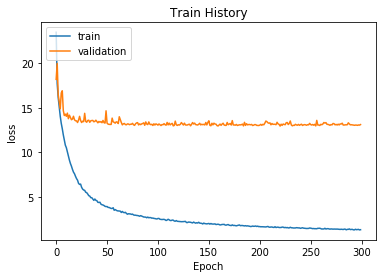

訓練集比賽正確率=57920/59397=0.9751334242470159
finalAns未初始，無須清空。
C:\dataset-0510\submit_test0.9751334242470159.csv檔案已儲存
開始測試參數:vs=0.05 ep=300 bs=100 ver=1
Train on 56427 samples, validate on 2970 samples
Epoch 1/300
56427/56427 [==============================] - 84s 1ms/step - loss: 23.5982 - mean_absolute_percentage_error: 23.5982 - mean_absolute_error: 2.5644 - val_loss: 21.6251 - val_mean_absolute_percentage_error: 21.6251 - val_mean_absolute_error: 2.7682
Epoch 2/300
56427/56427 [==============================] - 79s 1ms/step - loss: 17.5713 - mean_absolute_percentage_error: 17.5713 - mean_absolute_error: 1.9111 - val_loss: 16.9876 - val_mean_absolute_percentage_error: 16.9876 - val_mean_absolute_error: 1.9664
Epoch 3/300
56427/56427 [==============================] - 80s 1ms/step - loss: 16.0624 - mean_absolute_percentage_error: 16.0624 - mean_absolute_error: 1.7761 - val_loss: 19.7167 - val_mean_absolute_percentage_error: 19.7167 - val_mean_absolute_error: 1.8870
Epoch 4/300
56427/56427

Epoch 32/300
56427/56427 [==============================] - 77s 1ms/step - loss: 5.3009 - mean_absolute_percentage_error: 5.3009 - mean_absolute_error: 0.6448 - val_loss: 13.4378 - val_mean_absolute_percentage_error: 13.4378 - val_mean_absolute_error: 1.3821
Epoch 33/300
56427/56427 [==============================] - 78s 1ms/step - loss: 5.2078 - mean_absolute_percentage_error: 5.2078 - mean_absolute_error: 0.6304 - val_loss: 15.0287 - val_mean_absolute_percentage_error: 15.0287 - val_mean_absolute_error: 1.5484
Epoch 34/300
56427/56427 [==============================] - 76s 1ms/step - loss: 5.0953 - mean_absolute_percentage_error: 5.0953 - mean_absolute_error: 0.6152 - val_loss: 13.4030 - val_mean_absolute_percentage_error: 13.4030 - val_mean_absolute_error: 1.4208
Epoch 35/300
56427/56427 [==============================] - 76s 1ms/step - loss: 4.9804 - mean_absolute_percentage_error: 4.9804 - mean_absolute_error: 0.6050 - val_loss: 13.4737 - val_mean_absolute_percentage_error: 13.473

Epoch 64/300
56427/56427 [==============================] - 76s 1ms/step - loss: 3.3311 - mean_absolute_percentage_error: 3.3311 - mean_absolute_error: 0.4053 - val_loss: 13.2911 - val_mean_absolute_percentage_error: 13.2911 - val_mean_absolute_error: 1.3474
Epoch 65/300
56427/56427 [==============================] - 76s 1ms/step - loss: 3.3357 - mean_absolute_percentage_error: 3.3357 - mean_absolute_error: 0.4087 - val_loss: 13.1097 - val_mean_absolute_percentage_error: 13.1097 - val_mean_absolute_error: 1.3499
Epoch 66/300
56427/56427 [==============================] - 77s 1ms/step - loss: 3.2938 - mean_absolute_percentage_error: 3.2938 - mean_absolute_error: 0.3993 - val_loss: 13.1805 - val_mean_absolute_percentage_error: 13.1805 - val_mean_absolute_error: 1.3616
Epoch 67/300
56427/56427 [==============================] - 77s 1ms/step - loss: 3.3420 - mean_absolute_percentage_error: 3.3420 - mean_absolute_error: 0.4099 - val_loss: 13.2018 - val_mean_absolute_percentage_error: 13.201

Epoch 96/300
56427/56427 [==============================] - 77s 1ms/step - loss: 2.7091 - mean_absolute_percentage_error: 2.7091 - mean_absolute_error: 0.3362 - val_loss: 13.1559 - val_mean_absolute_percentage_error: 13.1559 - val_mean_absolute_error: 1.3597
Epoch 97/300
56427/56427 [==============================] - 77s 1ms/step - loss: 2.5331 - mean_absolute_percentage_error: 2.5331 - mean_absolute_error: 0.3083 - val_loss: 13.0833 - val_mean_absolute_percentage_error: 13.0833 - val_mean_absolute_error: 1.3300
Epoch 98/300
56427/56427 [==============================] - 77s 1ms/step - loss: 2.6705 - mean_absolute_percentage_error: 2.6705 - mean_absolute_error: 0.3331 - val_loss: 13.2375 - val_mean_absolute_percentage_error: 13.2375 - val_mean_absolute_error: 1.4178
Epoch 99/300
56427/56427 [==============================] - 77s 1ms/step - loss: 2.5364 - mean_absolute_percentage_error: 2.5364 - mean_absolute_error: 0.3108 - val_loss: 13.3276 - val_mean_absolute_percentage_error: 13.327

56427/56427 [==============================] - 76s 1ms/step - loss: 2.1830 - mean_absolute_percentage_error: 2.1830 - mean_absolute_error: 0.2697 - val_loss: 13.0882 - val_mean_absolute_percentage_error: 13.0882 - val_mean_absolute_error: 1.3370
Epoch 128/300
56427/56427 [==============================] - 76s 1ms/step - loss: 2.1637 - mean_absolute_percentage_error: 2.1637 - mean_absolute_error: 0.2683 - val_loss: 13.1430 - val_mean_absolute_percentage_error: 13.1430 - val_mean_absolute_error: 1.3256
Epoch 129/300
56427/56427 [==============================] - 76s 1ms/step - loss: 2.1777 - mean_absolute_percentage_error: 2.1777 - mean_absolute_error: 0.2695 - val_loss: 13.1123 - val_mean_absolute_percentage_error: 13.1123 - val_mean_absolute_error: 1.3460
Epoch 130/300
56427/56427 [==============================] - 76s 1ms/step - loss: 2.1988 - mean_absolute_percentage_error: 2.1988 - mean_absolute_error: 0.2715 - val_loss: 12.9787 - val_mean_absolute_percentage_error: 12.9787 - val_me

56427/56427 [==============================] - 77s 1ms/step - loss: 1.9211 - mean_absolute_percentage_error: 1.9211 - mean_absolute_error: 0.2386 - val_loss: 13.2238 - val_mean_absolute_percentage_error: 13.2238 - val_mean_absolute_error: 1.3086
Epoch 159/300
56427/56427 [==============================] - 77s 1ms/step - loss: 1.9082 - mean_absolute_percentage_error: 1.9082 - mean_absolute_error: 0.2377 - val_loss: 13.3356 - val_mean_absolute_percentage_error: 13.3356 - val_mean_absolute_error: 1.3197
Epoch 160/300
56427/56427 [==============================] - 78s 1ms/step - loss: 1.9093 - mean_absolute_percentage_error: 1.9093 - mean_absolute_error: 0.2363 - val_loss: 13.0824 - val_mean_absolute_percentage_error: 13.0824 - val_mean_absolute_error: 1.3125
Epoch 161/300
56427/56427 [==============================] - 78s 1ms/step - loss: 1.9227 - mean_absolute_percentage_error: 1.9227 - mean_absolute_error: 0.2401 - val_loss: 13.0319 - val_mean_absolute_percentage_error: 13.0319 - val_me

56427/56427 [==============================] - 77s 1ms/step - loss: 1.7149 - mean_absolute_percentage_error: 1.7149 - mean_absolute_error: 0.2137 - val_loss: 13.1012 - val_mean_absolute_percentage_error: 13.1012 - val_mean_absolute_error: 1.2968
Epoch 190/300
56427/56427 [==============================] - 77s 1ms/step - loss: 1.6957 - mean_absolute_percentage_error: 1.6957 - mean_absolute_error: 0.2104 - val_loss: 13.0344 - val_mean_absolute_percentage_error: 13.0344 - val_mean_absolute_error: 1.3380
Epoch 191/300
56427/56427 [==============================] - 77s 1ms/step - loss: 1.7607 - mean_absolute_percentage_error: 1.7607 - mean_absolute_error: 0.2209 - val_loss: 13.1519 - val_mean_absolute_percentage_error: 13.1519 - val_mean_absolute_error: 1.3025
Epoch 192/300
56427/56427 [==============================] - 77s 1ms/step - loss: 1.7309 - mean_absolute_percentage_error: 1.7309 - mean_absolute_error: 0.2157 - val_loss: 13.1546 - val_mean_absolute_percentage_error: 13.1546 - val_me

56427/56427 [==============================] - 77s 1ms/step - loss: 1.5802 - mean_absolute_percentage_error: 1.5802 - mean_absolute_error: 0.1984 - val_loss: 13.5320 - val_mean_absolute_percentage_error: 13.5320 - val_mean_absolute_error: 1.3215
Epoch 221/300
56427/56427 [==============================] - 77s 1ms/step - loss: 1.5601 - mean_absolute_percentage_error: 1.5601 - mean_absolute_error: 0.1943 - val_loss: 13.0789 - val_mean_absolute_percentage_error: 13.0789 - val_mean_absolute_error: 1.2890
Epoch 222/300
56427/56427 [==============================] - 76s 1ms/step - loss: 1.5500 - mean_absolute_percentage_error: 1.5500 - mean_absolute_error: 0.1933 - val_loss: 13.2537 - val_mean_absolute_percentage_error: 13.2537 - val_mean_absolute_error: 1.3055
Epoch 223/300
56427/56427 [==============================] - 76s 1ms/step - loss: 1.5868 - mean_absolute_percentage_error: 1.5868 - mean_absolute_error: 0.1993 - val_loss: 13.1055 - val_mean_absolute_percentage_error: 13.1055 - val_me

56427/56427 [==============================] - 78s 1ms/step - loss: 1.5089 - mean_absolute_percentage_error: 1.5089 - mean_absolute_error: 0.1904 - val_loss: 13.1666 - val_mean_absolute_percentage_error: 13.1666 - val_mean_absolute_error: 1.3060
Epoch 252/300
56427/56427 [==============================] - 78s 1ms/step - loss: 1.3905 - mean_absolute_percentage_error: 1.3905 - mean_absolute_error: 0.1721 - val_loss: 13.1349 - val_mean_absolute_percentage_error: 13.1349 - val_mean_absolute_error: 1.2946
Epoch 253/300
56427/56427 [==============================] - 78s 1ms/step - loss: 1.4351 - mean_absolute_percentage_error: 1.4351 - mean_absolute_error: 0.1809 - val_loss: 13.0662 - val_mean_absolute_percentage_error: 13.0662 - val_mean_absolute_error: 1.3253
Epoch 254/300
56427/56427 [==============================] - 78s 1ms/step - loss: 1.4574 - mean_absolute_percentage_error: 1.4574 - mean_absolute_error: 0.1840 - val_loss: 13.1913 - val_mean_absolute_percentage_error: 13.1913 - val_me

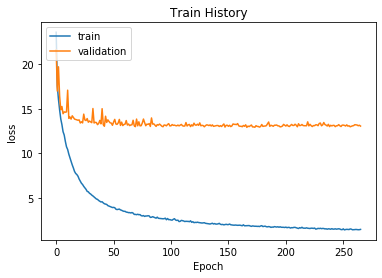

訓練集比賽正確率=57931/59397=0.9753186187854606
finalAns未初始，無須清空。
C:\dataset-0510\submit_test0.9753186187854606.csv檔案已儲存
以下公布最佳參數
得獎的參數是...
Best Parameter=0.05,300,100,1
Best Score=0.9753186187854606


(<keras.engine.sequential.Sequential at 0x15d6235bd68>, 0.9753186187854606)

In [24]:
#validation_split 訓練/驗證資料集分割比例
vsList=[0.05] 
#epochs=ep 訓練次數 (之前實驗多設為100，可以試試設為100,120,150)
epList=[300]
#batch_size 訓練每批數據量
bsList=[80, 100]
#bsList=[80]  
#verbose 0:不顯示訓練過程 1:顯示簡易訓練過程 2:顯示詳細訓練過程
ver=1
#超過幾批次訓練，loss沒降低時就自動停止訓練。設定99次幾乎等於不停止。
earlyStop=99
#設定訓練集比賽機制評分超過幾分時才存下答案 (建議可設定為90分)
saveScore=90
#設定要不要畫出訓練歷程圖表 0:不畫 1:畫
drawHistory=1
#設定要不要畫出錯誤率分布圖表 0:不畫 1:畫
drawErrorRate=0
#modelok,score=gridSearch(vsList,epList,bsList,ver,saveScore,drawHistory,drawErrorRate,earlyStop)
gridSearch(vsList,epList,bsList,ver,saveScore,drawHistory,drawErrorRate,earlyStop)


訓練集比賽正確率=57887/59397=0.9745778406316817

5677.8636419846

Best Parameter=0.05,300,100,1
Best Score=0.9560446968803196

### 20190720
### 'city_new','CT_new','CTV_new','lat_new','lon_new'

Best Parameter=0.05,300,80,1

Best Score=0.9754533057225112


Best Parameter=0.05,300,100,1

Best Score=0.975537485058168

5747.8663365078

In [26]:
matplotlib inline

In [27]:
%matplotlib inline